In [1]:
# 필수 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import StandardScaler

In [5]:
cp -r /content/drive/MyDrive/Colab\ Notebooks/final_project/data /content

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [4]:
# # 한글 폰트 설정
# !apt -qq -y install fonts-nanum > /dev/null

# plt.rc('font', family='NanumGothic')
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['figure.figsize'] = 12, 6
# plt.rcParams['font.size'] = 14

# print("한글 폰트 설정 완료 - 런타임 > 다시 시작 후 계속 실행")

In [6]:
# pyarrow 설치 (parquet 파일 읽기용)
!pip install pyarrow

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

In [7]:
# 데이터 로드: 6개월 청구정보 parquet 파일 병합
file_list = [
    '201807_train_청구정보.parquet',
    '201808_train_청구정보.parquet',
    '201809_train_청구정보.parquet',
    '201810_train_청구정보.parquet',
    '201811_train_청구정보.parquet',
    '201812_train_청구정보.parquet'
]

df_all = pd.concat([pd.read_parquet(f) for f in file_list], ignore_index=True)
print("병합 완료: ", df_all.shape)

병합 완료:  (2400000, 46)


In [8]:
# 결측치 처리
missing_cols = df_all.columns[df_all.isnull().any()]
missing_cols

Index([], dtype='object')

In [9]:
# 불필요한 컬럼 제거
cols_to_drop = ['대표결제방법코드', '청구서발송여부_R3M', '청구금액_R3M', '포인트_마일리지_환산_B0M']
df_all.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print("컬럼 제거 완료")

컬럼 제거 완료


In [10]:
# Segment 컬럼 가져오기
# parquet 파일 열기
df01 = pd.read_parquet("/content/data/train/1.회원정보/201807_train_회원정보.parquet")

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201807,TRAIN_399995,2,70대이상,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,노년생활,34
399996,201807,TRAIN_399996,2,50대,D,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),19
399997,201807,TRAIN_399997,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,13
399998,201807,TRAIN_399998,1,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),22


In [11]:
df_all = df_all.merge(df01[['ID', 'Segment']], on='ID', how='left')
df_all

,기준년월,ID,대표결제일,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R6M,청구금액_B0,청구금액_R6M,...,할인금액_청구서_B0M,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,혜택수혜금액,Segment
0,201807,TRAIN_000000,27,미확인,당사페이앱+이메일,문자메세지,1,1,12226,88693,...,0,5,3,0,0,1,0,3,0,D
1,201807,TRAIN_000001,13,주거지,우편,우편,1,1,5834,16861,...,163,6,3,0,0,0,0,0,0,E
2,201807,TRAIN_000002,1,미확인,이메일,이메일,1,1,21866,165221,...,0,6,3,0,0,0,0,121,50,C
3,201807,TRAIN_000003,5,주거지,우편,우편,1,1,16356,127371,...,0,5,3,2,0,0,0,3,2,D
4,201807,TRAIN_000004,13,주거지,우편,우편,0,1,0,155,...,0,1,1,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,25,주거지,우편,우편,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,TRAIN_399996,20,미확인,이메일,이메일,1,1,14402,99849,...,0,6,3,0,0,0,0,164,53,D
2399997,201812,TRAIN_399997,20,회사,우편,우편,1,1,5731,41073,...,0,6,3,0,0,0,0,0,0,C
2399998,201812,TRAIN_399998,20,주거지,우편,우편,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [12]:
# 데이터 개요 확인
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 43 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   기준년월              int64 
 1   ID                object
 2   대표결제일             int64 
 3   대표청구지고객주소구분코드     object
 4   대표청구서수령지구분코드      object
 5   청구서수령방법           object
 6   청구서발송여부_B0        int64 
 7   청구서발송여부_R6M       int64 
 8   청구금액_B0           int64 
 9   청구금액_R6M          int64 
 10  포인트_마일리지_건별_B0M   int64 
 11  포인트_마일리지_건별_R3M   int64 
 12  포인트_포인트_건별_B0M    int64 
 13  포인트_포인트_건별_R3M    int64 
 14  포인트_마일리지_월적립_B0M  int64 
 15  포인트_마일리지_월적립_R3M  int64 
 16  포인트_포인트_월적립_B0M   int64 
 17  포인트_포인트_월적립_R3M   int64 
 18  포인트_적립포인트_R12M    int64 
 19  포인트_적립포인트_R3M     int64 
 20  포인트_이용포인트_R12M    int64 
 21  포인트_이용포인트_R3M     int64 
 22  포인트_잔여포인트_B0M     int64 
 23  마일_적립포인트_R12M     int64 
 24  마일_적립포인트_R3M      int64 
 25  마일_이용포인트_R12M     int64 
 26  마일_이용포인트_R3M      int64 
 27  마일_잔여포인트_B0M

In [13]:
# 결측치 아니지만 값이 '미확인'
df_all['대표청구지고객주소구분코드'].unique()

array(['미확인', '주거지', '회사'], dtype=object)

In [14]:
df_all['대표청구지고객주소구분코드'].value_counts()

,count
대표청구지고객주소구분코드,
미확인,1123850
주거지,1023633
회사,252517


In [15]:
pivot_count = pd.crosstab(df_all['Segment'], df_all['대표청구지고객주소구분코드'])
pivot_count

대표청구지고객주소구분코드,미확인,주거지,회사
Segment,,,
A,537,293,142
B,96,30,18
C,73379,40977,13234
D,191668,124460,33114
E,858170,857873,206009


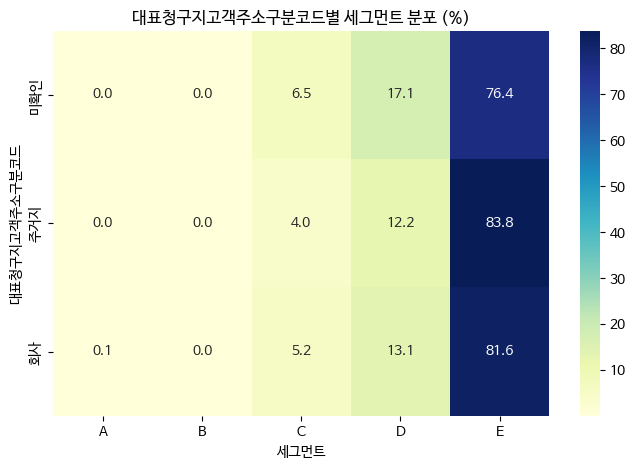

In [16]:
#  대표청구지고객주소구분코드별 세그먼트(cluster) 분포 비율 확인 (행 기준 정규화)
cross_tab = pd.crosstab(df_all['대표청구지고객주소구분코드'], df_all['Segment'], normalize='index') * 100

#  시각화
plt.figure(figsize=(8, 5))
sns.heatmap(cross_tab, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title("대표청구지고객주소구분코드별 세그먼트 분포 (%)")
plt.xlabel("세그먼트")
plt.ylabel("대표청구지고객주소구분코드")
plt.show()

In [ ]:
# sns.countplot(data=df_all, x='대표청구지고객주소구분코드')
# plt.title("대표청구지고객주소구분코드 분포")
# plt.show()

In [32]:
# '대표청구지고객주소구분코드' 컬럼 제거
df_all.drop(columns=['대표청구지고객주소구분코드'], inplace=True, errors='ignore')

In [33]:
# 클러스터별 평균값 (수치형만 보기 좋게 요약)
cluster_summary = df_all.groupby('Segment').mean(numeric_only=True).round(2)
cluster_summary.T  # 전치로 보기 편하게


Segment,A,B,C,D,E
기준년월,201809.50,201809.50,201809.50,201809.50,201809.50
대표결제일,17.71,14.76,17.20,16.70,17.02
청구서발송여부_B0,1.00,1.00,0.97,0.96,0.73
청구서발송여부_R6M,0.99,1.00,0.97,0.96,0.82
청구금액_B0,49514.36,47600.67,20001.55,10703.87,3022.29
청구금액_R6M,316939.46,316174.26,128408.24,69963.94,19778.69
포인트_마일리지_건별_B0M,565.26,605.62,198.76,85.48,15.49
포인트_마일리지_건별_R3M,1685.14,1807.91,583.70,248.13,44.38
포인트_포인트_건별_B0M,806.45,1005.22,573.76,470.56,198.63
포인트_포인트_건별_R3M,2322.02,2837.69,1660.88,1355.04,559.55


In [34]:
# ls

In [36]:
# # 한글이 깨지지 않도록 utf-8-sig 인코딩 적용
# df_all.to_csv('df_all_final.csv', index=False, encoding='utf-8-sig')

# from google.colab import files
# files.download('df_all_final.csv')

In [20]:
# df_all.info()
# df_all.describe()
# df_all.isnull().sum()

In [21]:
# # 이상치 확인
# def detect_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#     print(f"[{column}] 이상치 개수: {len(outliers)}")
#     return outliers[['ID', column]]

# # 분석 대상 컬럼 리스트
# target_columns = ['할인금액_R3M', '혜택수혜금액']

# # 이상치 탐지 결과 저장
# outlier_results = {}

# # 각 컬럼별 이상치 확인
# for col in target_columns:
#     outliers = detect_outliers_iqr(df_all, col)
#     outlier_results[col] = outliers

In [22]:
# # 데이터 샘플 추출
# # 1. (선택) 데이터 샘플링: df_all에서 500개 샘플 추출
# df_all_sample = df_all.sample(n=500, random_state=42)  # 또는 head(n)

# # 2. CSV 파일로 저장 (인코딩은 Excel 호환 위해 cp949 사용)
# df_all_sample.to_csv('df_all_sample.csv', index=False, encoding='cp949')

# # 3. 로컬로 다운로드
# from google.colab import files
# files.download('df_all_sample.csv')

In [23]:
# # 1. 컬럼명 확인
# print(df_all_sample.columns.tolist())

# # 2. 데이터 미리보기
# print(df_all_sample.head(3))

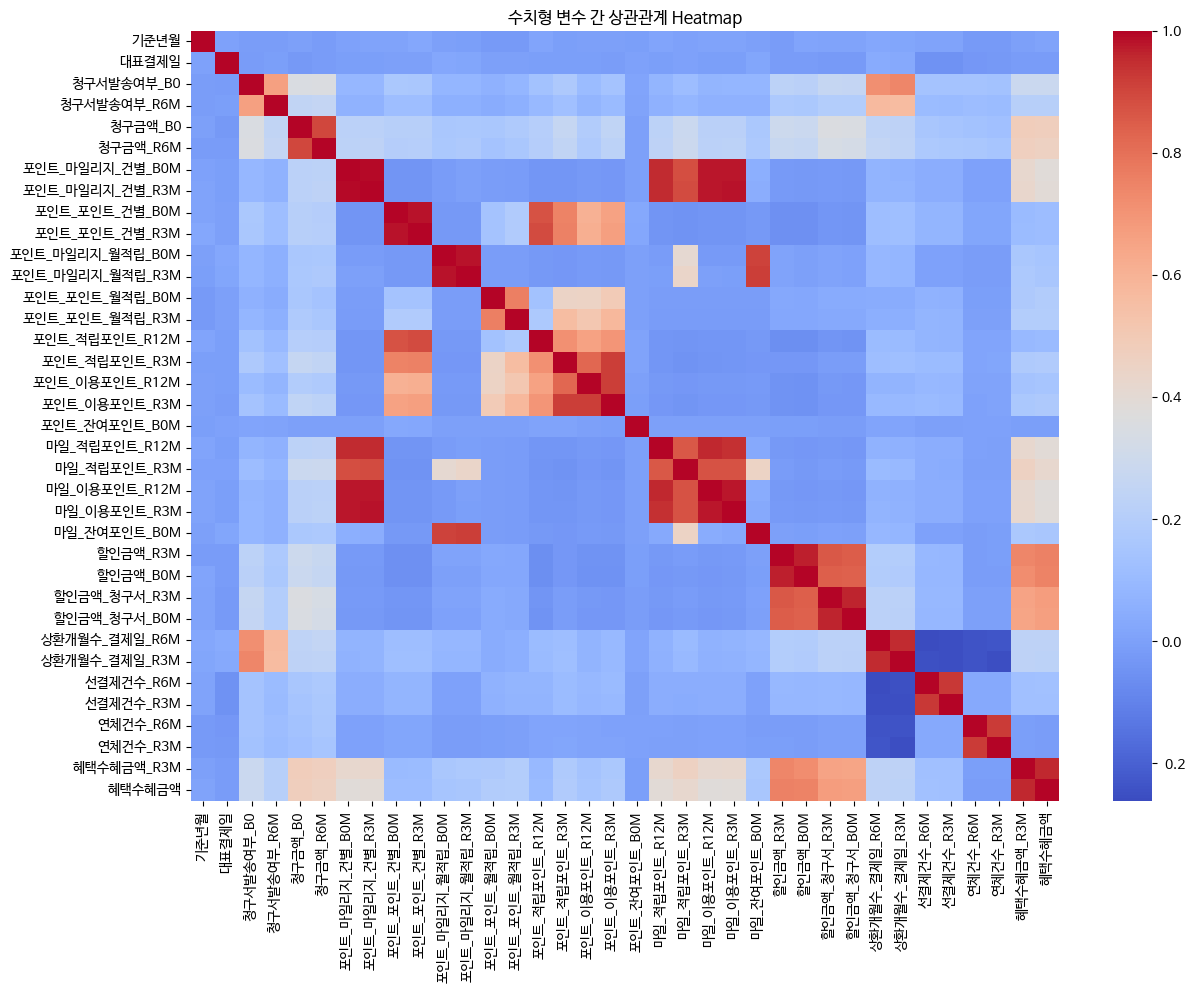

In [24]:
# 변수 간 상관관계 확인

# 수치형 변수만 선택
num_df = df_all.select_dtypes(include='number')

# 상관계수 히트맵
plt.figure(figsize=(14, 10))
sns.heatmap(num_df.corr(), annot=False, cmap='coolwarm')
plt.title("수치형 변수 간 상관관계 Heatmap")
plt.show()

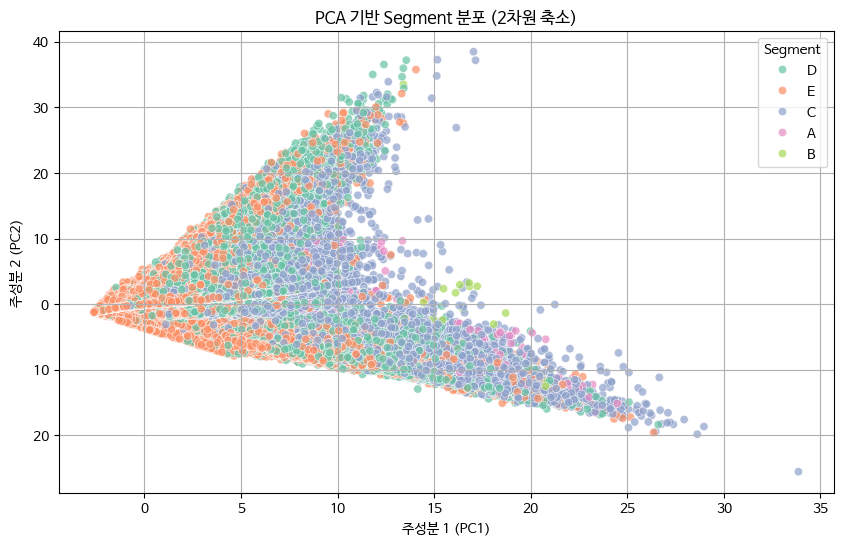

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼만 추출 (ID, segment 제외)
features = df_all.select_dtypes(include='number').drop(columns=['ID'], errors='ignore')

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# PCA 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 저장
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Segment'] = df_all['Segment'].values

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Segment', palette='Set2', alpha=0.7)
plt.title("PCA 기반 Segment 분포 (2차원 축소)")
plt.xlabel("주성분 1 (PC1)")
plt.ylabel("주성분 2 (PC2)")
plt.legend(title='Segment')
plt.grid(True)
plt.show()


In [37]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# def calculate_vif(X):
#     X = add_constant(X)  # 상수항 추가 (intercept)
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = X.columns
#     vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif_data

In [38]:
# # 수치형 데이터만 다중공선성(VIF)계산
# numeric_cols = df_all.select_dtypes(include='number')
# vif_result = calculate_vif(numeric_cols)
# print(vif_result)

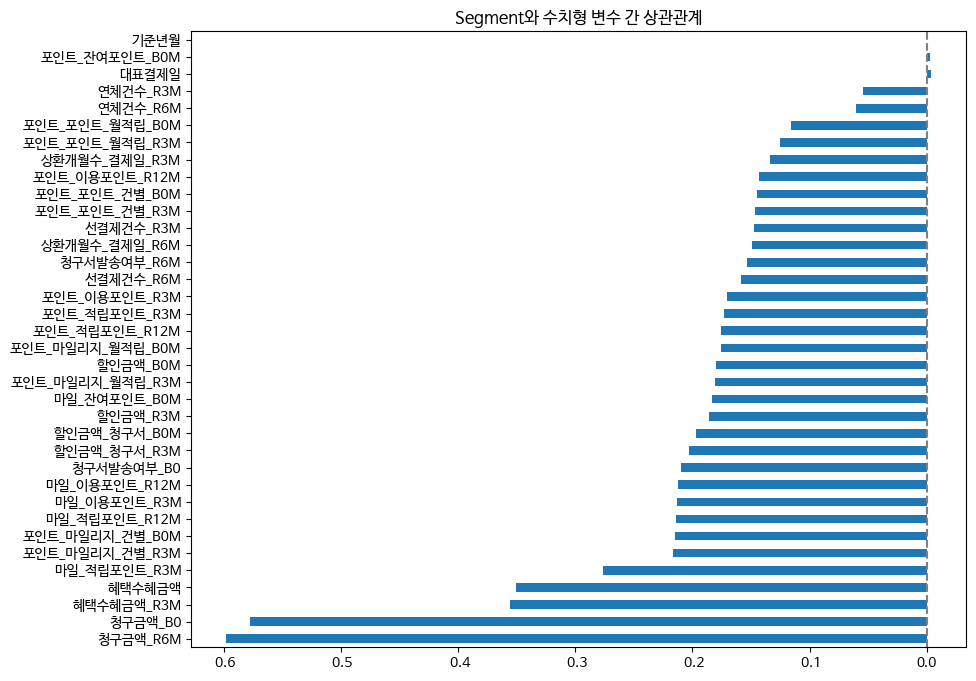

In [40]:
# 수치형 변수만 선택
num_cols = df_all.select_dtypes(include='number').drop(columns=['ID'], errors='ignore').columns

# Segment를 숫자로 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_all['Segment_code'] = le.fit_transform(df_all['Segment'])

# 상관계수 계산 (Segment vs 각 수치형 변수)
correlations = df_all[num_cols].corrwith(df_all['Segment_code']).sort_values(key=abs, ascending=False)

# 상관계수 시각화
correlations.plot(kind='barh', figsize=(10, 8))
plt.title('Segment와 수치형 변수 간 상관관계')
plt.axvline(x=0, color='gray', linestyle='--')
plt.show()

In [ ]:
# # parquet 파일 열기
# df1 = pd.read_parquet("201807_train_청구정보.parquet")

# # csv로 저장
# df1.to_csv("201807_train_청구정보.csv", index=False)


In [ ]:
# # parquet 파일 열고 csv로 저장
# df2 = pd.read_parquet("201807_train_청구정보.parquet")
# df2.to_csv("201807_train_청구정보.csv", index=False)

# df3 = pd.read_parquet("201807_train_청구정보.parquet")
# df3.to_csv("201807_train_청구정보.csv", index=False)

# df4 = pd.read_parquet("201807_train_청구정보.parquet")
# df4.to_csv("201807_train_청구정보.csv", index=False)

# df5 = pd.read_parquet("201807_train_청구정보.parquet")
# df5.to_csv("201807_train_청구정보.csv", index=False)

# df6 = pd.read_parquet("201807_train_청구정보.parquet")
# df6.to_csv("201807_train_청구정보.csv", index=False)